In [3]:
import os

diretorio = 'C:\\Users\\lucas\\Downloads\\TCC-FSS\\esp_quad_lucas'

arquivos_txt = [arquivo for arquivo in os.listdir(diretorio) if arquivo.endswith('.txt')]

# Processa cada arquivo .txt
for arquivo_txt in arquivos_txt:
    arquivo_entrada = os.path.join(diretorio, arquivo_txt)
    arquivo_saida = os.path.join(diretorio, arquivo_txt.replace('.txt', '.csv'))
    
    with open(arquivo_entrada, 'r') as txt_file, open(arquivo_saida, 'w', newline='') as csv_file:
        for linha in txt_file:
            # Remove espaços no início e no final, e divide a linha nos espaços
            valores = linha.strip().split()
            
            linha_csv = ','.join(valores)
            
            csv_file.write(linha_csv + '\n')
    
    print(f'Arquivo "{arquivo_saida}" gerado com sucesso.')

print('Todos os arquivos .txt foram convertidos para .csv com sucesso.')


Arquivo "C:\Users\lucas\Downloads\TCC-FSS\esp_quad_lucas\h_0_02_p_10_d_6_w_0_2.csv" gerado com sucesso.
Arquivo "C:\Users\lucas\Downloads\TCC-FSS\esp_quad_lucas\h_0_02_p_10_d_6_w_0_4.csv" gerado com sucesso.
Arquivo "C:\Users\lucas\Downloads\TCC-FSS\esp_quad_lucas\h_0_02_p_10_d_6_w_0_6.csv" gerado com sucesso.
Arquivo "C:\Users\lucas\Downloads\TCC-FSS\esp_quad_lucas\h_0_02_p_10_d_6_w_0_8.csv" gerado com sucesso.
Arquivo "C:\Users\lucas\Downloads\TCC-FSS\esp_quad_lucas\h_0_02_p_10_d_6_w_1.csv" gerado com sucesso.
Arquivo "C:\Users\lucas\Downloads\TCC-FSS\esp_quad_lucas\h_0_02_p_10_d_7_5_w_0_2.csv" gerado com sucesso.
Arquivo "C:\Users\lucas\Downloads\TCC-FSS\esp_quad_lucas\h_0_02_p_10_d_7_5_w_0_4.csv" gerado com sucesso.
Arquivo "C:\Users\lucas\Downloads\TCC-FSS\esp_quad_lucas\h_0_02_p_10_d_7_5_w_0_6.csv" gerado com sucesso.
Arquivo "C:\Users\lucas\Downloads\TCC-FSS\esp_quad_lucas\h_0_02_p_10_d_7_5_w_0_8.csv" gerado com sucesso.
Arquivo "C:\Users\lucas\Downloads\TCC-FSS\esp_quad_lucas\h

In [1]:
import pandas as pd

db = pd.read_csv('esp_quad_lucas/h_0_16_p_20_d_18_w_2_5.csv')
db.head()

,Frequencia(GHZ),Atenuacao(dB)
0,1.0,-0.367327
1,1.5,-0.843152
2,2.0,-1.556662
3,2.5,-2.566359
4,3.0,-3.965250


In [2]:
import matplotlib.pyplot as plt

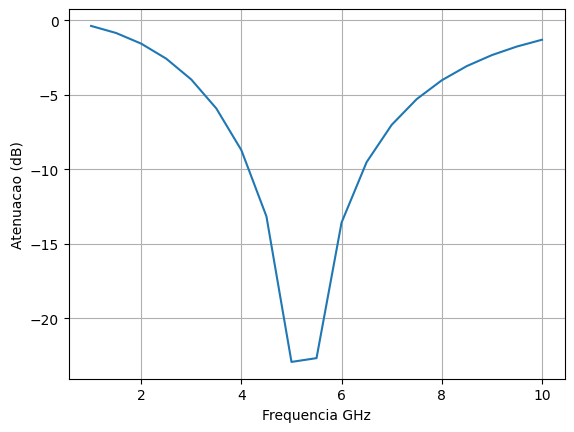

In [3]:
plt.figure()

x = db['Frequencia(GHZ)']
y = db['Atenuacao(dB)']

plt.grid()
plt.plot(x, y)
plt.xlabel("Frequencia GHz")
plt.ylabel("Atenuacao (dB)")
plt.show()


In [4]:
resonant_frequency = db['Atenuacao(dB)'].min()
resonant_frequency

-22.93680697216949

In [10]:
BW = db[(db['Atenuacao(dB)'] <= -10) & (db['Atenuacao(dB)'] > -14)]

BW

,Frequencia(GHZ),Atenuacao(dB)
7,4.5,-13.160620
10,6.0,-13.572274


In [78]:
BW, resonant_frequency

(2.25, -38.706526846229146)

In [26]:
import pandas as pd
import os

diretorio_entrada = 'C:\\Users\\lucas\\Downloads\\TCC-FSS\\esp_quad_lucas'

diretorio_saida = 'C:\\Users\\lucas\\Downloads\\TCC-FSS\\esp_quad_lucas\\resultados'

if not os.path.exists(diretorio_saida):
    os.makedirs(diretorio_saida)

# Percorrendo cada arquivo no diretório de entrada
for arquivo in os.listdir(diretorio_entrada):
    if arquivo.endswith('.csv'):
        caminho_completo = os.path.join(diretorio_entrada, arquivo)
        
        db = pd.read_csv(caminho_completo)
        
        try:
            resonant_frequency = db['Atenuacao(dB)'].min()
        except KeyError:
            print(f"Erro: A coluna 'Atenuacao(dB)' não foi encontrada no arquivo {arquivo}.")
            continue  
        
        valores_abaixo_10 = db[db['Atenuacao(dB)'] < -10]
        if not valores_abaixo_10.empty:
            primeiro_valor_abaixo_10 = valores_abaixo_10.iloc[0]
            ultimo_valor_abaixo_10 = valores_abaixo_10.iloc[-1]
            BW = ultimo_valor_abaixo_10['Frequencia(GHZ)'] - primeiro_valor_abaixo_10['Frequencia(GHZ)']
            resultados_df = pd.DataFrame({
                'resonant_frequency(dB)': [resonant_frequency],
                'BW(GHZ)': [BW],
            })
        else:
            continue

        # Construindo o caminho de saída com o nome do arquivo original
        nome_arquivo_saida = f"{os.path.splitext(arquivo)[0]}.csv"
        caminho_arquivo_saida = os.path.join(diretorio_saida, nome_arquivo_saida)
        
        resultados_df.to_csv(caminho_arquivo_saida, index=False)

        print(f'Resultados salvos em: {caminho_arquivo_saida}')


Resultados salvos em: C:\Users\lucas\Downloads\TCC-FSS\esp_quad_lucas\resultados\h_0_02_p_10_d_6_w_0_2.csv
Resultados salvos em: C:\Users\lucas\Downloads\TCC-FSS\esp_quad_lucas\resultados\h_0_02_p_10_d_6_w_0_4.csv
Resultados salvos em: C:\Users\lucas\Downloads\TCC-FSS\esp_quad_lucas\resultados\h_0_02_p_10_d_6_w_0_6.csv
Resultados salvos em: C:\Users\lucas\Downloads\TCC-FSS\esp_quad_lucas\resultados\h_0_02_p_10_d_6_w_0_8.csv
Resultados salvos em: C:\Users\lucas\Downloads\TCC-FSS\esp_quad_lucas\resultados\h_0_02_p_10_d_6_w_1.csv
Resultados salvos em: C:\Users\lucas\Downloads\TCC-FSS\esp_quad_lucas\resultados\h_0_02_p_10_d_7_5_w_0_2.csv
Resultados salvos em: C:\Users\lucas\Downloads\TCC-FSS\esp_quad_lucas\resultados\h_0_02_p_10_d_7_5_w_0_4.csv
Resultados salvos em: C:\Users\lucas\Downloads\TCC-FSS\esp_quad_lucas\resultados\h_0_02_p_10_d_7_5_w_0_6.csv
Resultados salvos em: C:\Users\lucas\Downloads\TCC-FSS\esp_quad_lucas\resultados\h_0_02_p_10_d_7_5_w_0_8.csv
Resultados salvos em: C:\Users\